
# Projet d'Analyse des Données Astronomiques

## Énoncé du projet

Ce projet vise à analyser et modéliser des données astronomiques issues de l'observation des lunes, planètes, soleils et astéroïdes. 
L'objectif est d'explorer ces données pour :
- Comprendre les relations entre les caractéristiques physiques des objets célestes.
- Construire un modèle prédictif capable de classifier ou prédire certains attributs des objets.

### Étapes principales :
1. **Importation et exploration des données** : Charger et analyser les structures principales des jeux de données.
2. **Prétraitement des données** : Nettoyage et préparation des données pour les analyses ultérieures.
3. **Analyse exploratoire** : Identifier les relations et tendances via des visualisations.
4. **Modélisation et évaluation** : Construire un modèle de machine learning pour des prédictions ou classifications spécifiques.
5. **Conclusions et perspectives** : Synthétiser les résultats et proposer des axes d'amélioration.



In [1]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt
import warnings
from IPython.display import display, HTML # Pour afficher les données dans Jupyter Notebook avec un format HTML
# ***********************   Librairie personnelle  **************************************
from utils import process_and_plot_graphs2,prepare_data_graph
from EcritureCSV import create_csv
from DataProcessing import Nbr_Moons2,get_unique_planet_types
from KNN import KNN_Classifier
from RandomForest import RandomForest2
from Evetools import TriData
from DeepLearning import Deep,Deep2

ValeurRandom = 42

warnings.filterwarnings('ignore')

# Configuration globale pour pandas
pd.set_option('display.max_columns', None)  # Afficher toutes les colonnes
pd.set_option('display.max_rows', None)     # Afficher toutes les lignes
pd.set_option('display.width', 500)       # Largeur totale (éviter retour à la ligne)
pd.set_option('display.colheader_justify', 'left')  # Alignement à gauche des en-têtes
# Augmenter la largeur de la cellule dans Jupyter
display(HTML("<style>.container { width:100% !important; }</style>"))
 


## Importation et exploration des données

### Objectif :
Charger les données brutes et examiner leurs structures, dimensions, et caractéristiques globales.

### Méthodologie :
1. Charger les données à partir de `EveDataAI.csv` en utilisant des bibliothèques Python.
2. Diviser les données en catégories principales :
    - **df_moon** : Données sur les lunes.
    - **df_planet** : Données sur les planètes.
    - **df_sun** : Données sur les soleils.
    - **df_asteroid** : Données sur les astéroïdes.
3. Inspecter les colonnes, les valeurs manquantes et les types de données.

### Résultat attendu :
Une compréhension globale des données disponibles et leur organisation.


In [2]:
# Lecture des données à partir du fichier 'EveDataAI.csv'
tri_data = TriData('EveDataAI.csv')

# Séparation des données en quatre DataFrames :
# - df_moon : données relatives aux lunes.
# - df_planet : données relatives aux planètes.
# - df_sun : données relatives au soleil.
# - df_asteroid : données relatives aux astéroïdes.
df_moon, df_planet, df_sun, df_asteroid = tri_data.get_dataframes()

# Option : Sauvegarde des DataFrames dans des fichiers CSV pour analyse future
# Par exemple, sauvegarde des données concernant le soleil (df_sun)
# create_csv(df_sun, "df_sun.csv")

# Prétraitement des données des lunes (df_moon) :
# Suppression des colonnes inutiles 'spectralClass' (classe spectrale) et 'life' (vie) car non pertinentes pour l'analyse.
df_moon = df_moon.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des lunes dans un fichier CSV
# create_csv(df_moon, "df_moon.csv")

# Prétraitement des données des planètes (df_planet) :
# Suppression de la colonne 'spectralClass' car elle n'apporte pas d'information utile à ce stade.
df_planet = df_planet.drop(columns=['spectralClass'], errors='ignore')
df_type_planet = get_unique_planet_types(df_planet)

# Sauvegarde des données prétraitées des planètes dans un fichier CSV.
#create_csv(df_planet, "df_planet.csv")

# Prétraitement des données des astéroïdes (df_asteroid) :
# Suppression des colonnes 'spectralClass' et 'life' car elles ne sont pas pertinentes pour l'analyse des astéroïdes.
df_asteroid = df_asteroid.drop(columns=['spectralClass', 'life'], errors='ignore')

# Option : Sauvegarde des données prétraitées des astéroïdes dans un fichier CSV
# create_csv(df_asteroid, "df_asteroid.csv")


✅ Colonne 'spectralClass' convertie en numérique.
✅ Colonne 'massDust' convertie en numérique.


 Affichage du dataset Moon   : On regarde la distribution pour toutes les lunes entre la densité et rayon afin de voir la distribution des valeurs sur l'ensemble du dataset


In [ ]:

SystemMoonEchantillon = df_moon

plot = SystemMoonEchantillon.hvplot.scatter(x='radius', y='density',label ='density').opts(xrotation=90,yaxis='left',color='blue')
plot


Étude de la corrélation entre la densité et le rayon des lunes d'un système solaire

Introduction :
L'objectif de cette étude est de déterminer si la répartition du ratio densité-rayon dans un système solaire suit une distribution aléatoire ou si elle obéit à une certaine logique mathématique.

Pour ce faire, nous travaillerons uniquement sur des données relatives aux lunes. Dans un premier temps, nous nous concentrerons sur les systèmes planétaires possédant plus de 7 lunes. Ensuite, nous sélectionnerons quelques exemples pour analyser si une logique sous-jacente peut être identifiée.

Pour cela nous identifier dans notre dataset, les systèmes solaire ayant plus de 7 lunes (choix impirique, mais qui donne suffisament de point pour une étude).



In [ ]:
SystemMoonEchantillon = df_moon
create_csv(SystemMoonEchantillon,'SystemMoonEchantillon.csv')
# création d'une dataframe pour les lunes qui donne le système et le nombre de lunes par planète
Moons = Nbr_Moons2(SystemMoonEchantillon)
# On filtre les lunes qui ont plus de 7 lunes
filtered_moons = Moons[Moons['MoonCount'] > 7]
# On affiche les données des 20 premières lunes ayant plus de 7 lunes
print(filtered_moons.head(20))
# On choisit plusieurs systèmes pour lesquels on veut afficher les lunes
# Jark V avec 18 lunes
# Akpivem III avec 8 lunes
# Sasta VIII avec 22 lunes
# Abai IV avec 16 lunes
# Chidah V avec 10 lunes

Graph1_Moons_Name = ['Jark V','Akpivem III','Sasta VIII','Abai IV','Chidah V']
# Préparation des données pour le graphique
Graph_Moons_Dict = {}
Label_Curve_Dict = {}
for i,name in enumerate(Graph1_Moons_Name,start=1):
    pattern = rf'\b{name}\b'
    Graph_Moons_Dict[f'Graph{i}_Moons'] = SystemMoonEchantillon[
    SystemMoonEchantillon['itemName'].str.contains(pattern, case=False, na=False)] 
    Label_Curve_Dict[f'{i}'] = name
# on crée un graphique du système planétaire Chidah V afin de voir la répartion de ces lunes dans un graphique.
Graph_Moons_Dict['Graph1_Moons'].hvplot.scatter(x='radius', y='density',label =Label_Curve_Dict[str(i)]).opts(xrotation=90,yaxis='left',color='blue',height=600,width=1200,fontsize={'title': 15, 'labels': 10, 'xticks': 15, 'yticks': 10})

Suite au graphique du système de Chidah V, il semble qu'une relation polynomiale se dessine. Pour vérifier cette hypothèse, nous allons représenter l'ensemble de notre échantillonnage sur un graphique en utilisant une distribution polynomiale de degré 4 (valeur déterminée après essais).

Je rappelle que l'ensemble des systèmes solaires a été sélectionné de manière aléatoire.


In [ ]:
plot = process_and_plot_graphs2(Graph_Moons_Dict, Label_Curve_Dict,4)
plot

Conclusion de l'analyse des lunes : Il est intéressant de noter qu'il existe une relation mathématique significative entre le rayon (radius) et la densité. Cela tend à démontrer que les données ne sont pas aléatoires.

Nous allons donc pousser l'analyse sur les Planètes afin de voir ce qu'il est possible d'analyser.

# *****************************************************************************************************************************************************

Début de l'anayse des Planètes :

Il existe plusieurs type de planète dans notre dataset, afin de confirmer le fait que ces données ne sont pas complètement aléatoire, nous allons faire un graphique pour voir si le dispatching des planètes de même type a une répartition aléatoire ou pas.

On regarde si la répartition des données radius, gravity par type de planète à un sens. Voir si il est possible que cela représente des clusters de planète type.
On prendra en analyse des types de planète ayant des caractéristiques très opposées pour valider.

Planète de type : Lava , Gas , Ice la density doit être très différente


In [ ]:
# Copie du set de données
#df_planet_gas,df_planet_lava,df_planet_ice = df_planet,df_planet,df_planet
# On filtre les données

Graph1 = prepare_data_graph(df_planet,'Gas','radius','density')
Graph2 = prepare_data_graph(df_planet,'Lava','radius','density')
Graph3 = prepare_data_graph(df_planet,'Ice','radius','density')

desc_graph1 = Graph1.describe().add_prefix('Gas_')
desc_graph2 = Graph2.describe().add_prefix('Lava_')
desc_graph3 = Graph3.describe().add_prefix('Ice_')

# Combine into a single DataFrame
comparison = pd.concat([desc_graph1, desc_graph2, desc_graph3], axis=1)

# Display the comparison
print(comparison)
# Create scatter plots
scatter_gas = Graph1.hvplot.scatter(x='radius', y='density', label='Gas Density', color='blue').opts(xrotation=90, yaxis='left')
scatter_lava = Graph2[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Lava Density', color='red').opts(xrotation=90, yaxis='left')
scatter_ice = Graph3[['radius', 'density']].hvplot.scatter(x='radius', y='density', label='Ice Density', color='green').opts(xrotation=90, yaxis='left')
# Combine the three plots
combined_plot = scatter_gas * scatter_lava  * scatter_ice

# Show the combined plot
combined_plot
# sns.pairplot(SystemPlaneteEchantillon, hue='TypeCoreName')

On peut voir qu'il existe bien zone de forte densité pour chaques type de planète. Nous allons donc utiliser les méthodes de classification pour voir si un modèle peut-être utilisé pour déterminer le type de planète en fonction de paramètre disponible dans le dataset. 

Pour ce faire nous allons utilisés trois méthodes :

    * K-NN en Classification
    * Random Forest
    * Deep Learning



Description de la fonction KNN_Classifier

La fonction KNN_Classifier est conçue pour effectuer une classification supervisée à l'aide de l'algorithme des k-plus proches voisins (k-NN). Elle inclut des étapes de prétraitement, de gestion des déséquilibres via SMOTE, et de sélection optimale des hyperparamètres pour le modèle. Voici un aperçu des étapes et méthodes utilisées :
Étapes principales
1. Filtrage des classes

Les classes ayant moins d'exemples qu'un seuil minimal (Echantillon_min) sont filtrées. Cette étape garantit que seules les classes avec une quantité suffisante de données sont utilisées dans l'analyse.
2. Préparation des données

    Les colonnes d'entrée (X_Chara) et la cible (Y_Target) sont transformées via la fonction Calcul_XX_YY, qui encode les valeurs cibles et prépare les données pour l'entraînement.
    Les données d'entrée sont standardisées à l'aide de StandardScaler, ce qui est essentiel pour les modèles k-NN, qui utilisent des distances dans leurs calculs.

3. Division des données

Les données sont divisées en ensembles d'entraînement et de test à l'aide de la fonction split_data. Cela permet une évaluation indépendante du modèle.
4. Équilibrage des classes avec SMOTE

Si l'option smote_status est activée :

    SMOTE est utilisé pour générer des exemples synthétiques pour les classes sous-représentées.
    La répartition des classes après SMOTE est affichée pour validation.

5. Réduction de dimensionnalité (PCA)

Si l'option PCA_State est activée :

    Une analyse en composantes principales (PCA) est effectuée pour réduire la dimensionnalité des données, tout en conservant un pourcentage spécifié de variance (variance).
    Les ensembles d'entraînement et de test sont transformés dans l'espace réduit.

6. Optimisation des hyperparamètres

L'algorithme k-NN est paramétré via GridSearchCV, qui explore les meilleures combinaisons des hyperparamètres suivants :

    n_neighbors : Nombre de voisins à considérer.
    weights : Méthode pour pondérer les voisins (uniforme ou basée sur la distance).
    metric : Mesure de distance (euclidienne, manhattan, minkowski).
    Le nombre optimal de voisins (k) est sélectionné en fonction de la précision (accuracy).

7. Entraînement et prédictions

    Le modèle k-NN avec les meilleurs hyperparamètres est entraîné sur l'ensemble d'entraînement.
    Les prédictions sont effectuées sur les ensembles d'entraînement et de test.

8. Évaluation des performances

Les performances sont mesurées à l'aide des métriques suivantes :

    Accuracy (précision) sur les ensembles d'entraînement et de test.
    Classification report (précision, rappel, F1-score par classe).
    Les probabilités de prédiction sont également calculées pour l'ensemble de test.

9. Affichage des graphiques

Plusieurs visualisations sont générées pour interpréter les résultats du modèle :

    Matrice de confusion : Analyse des erreurs de classification.
    Courbe ROC : Évaluation des performances pour chaque classe.
    Courbe d'apprentissage : Mesure de la capacité d'apprentissage et de généralisation.
    Distribution des probabilités de prédiction : Visualisation des probabilités par classe.

10. Sauvegarde des résultats

Si l'option Save_Model est activée :

    Le modèle entraîné et ses paramètres sont sauvegardés.
    Les graphiques générés (matrice de confusion, courbe ROC, etc.) sont enregistrés.
    Les résultats, y compris les métriques et hyperparamètres, sont archivés pour une consultation ultérieure.


TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       
Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
Nombre de composantes principales retenues : 8
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Optimal k: 14
Meilleurs paramètres : KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='distance')
-----------------------------------------------------------------------------------------

Entraînement sur 54368 échantillons, test sur 13592 échantillons
Nombre de classes : 9
Classes : ['Planet (Barren)' 

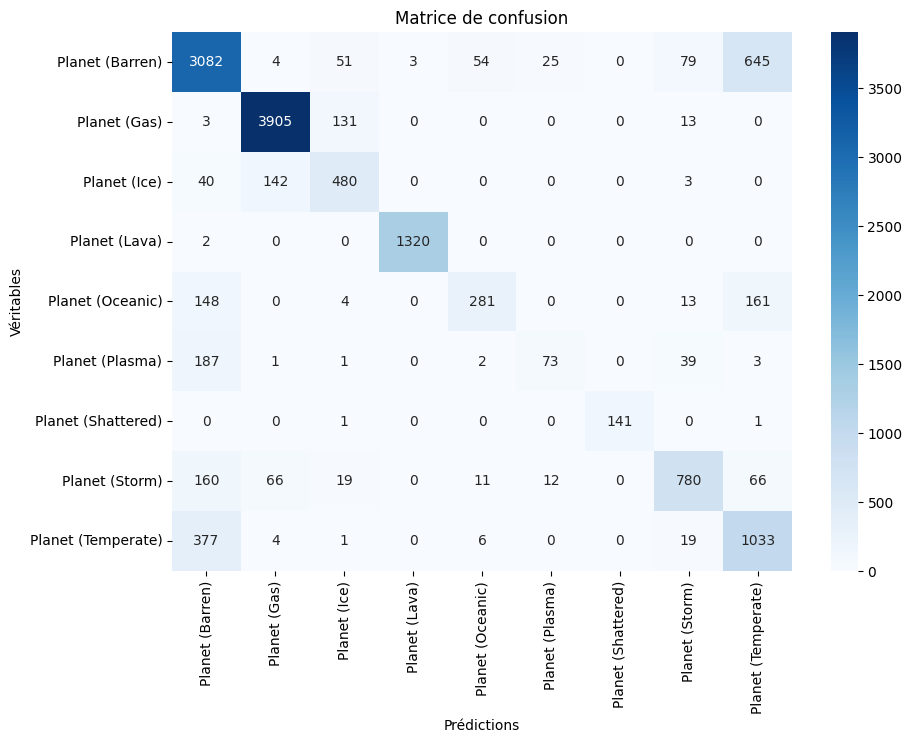

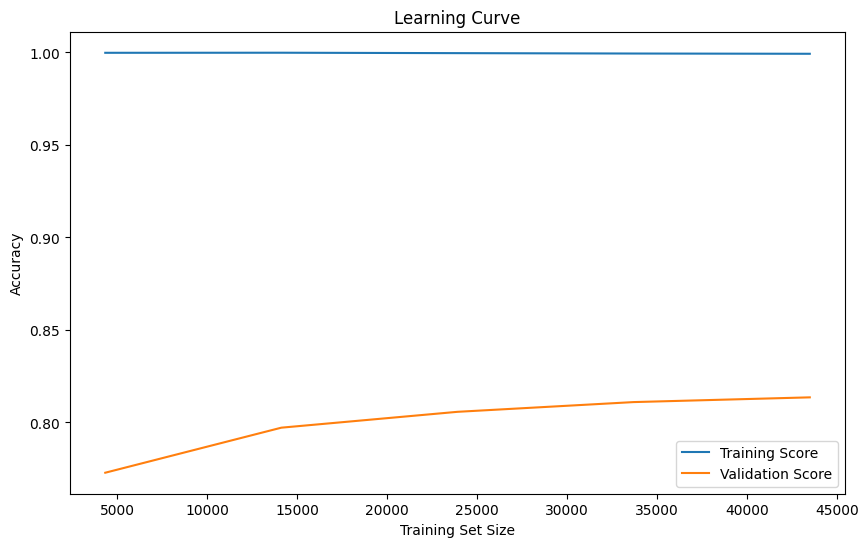

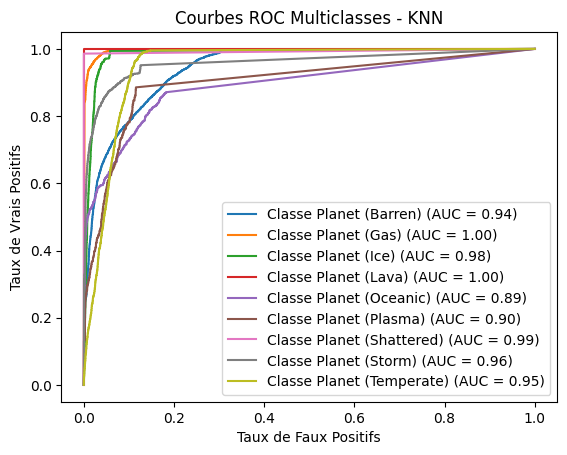

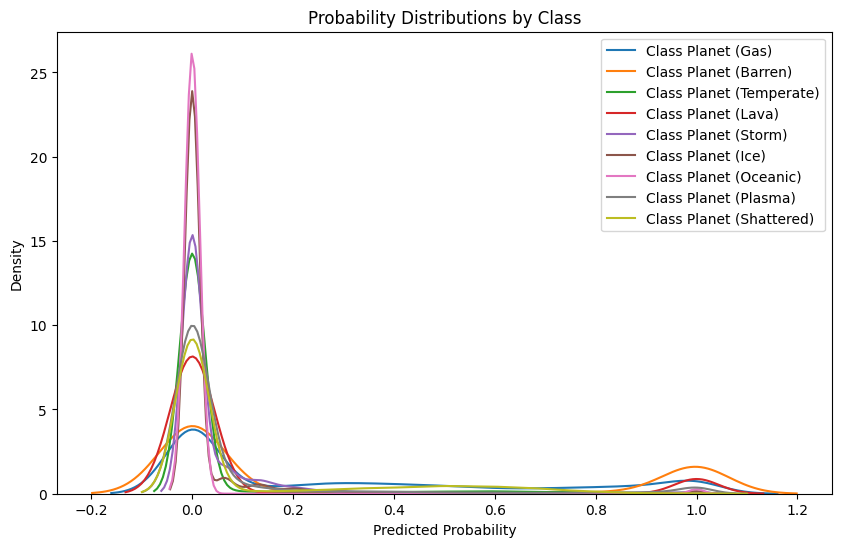

Fichiers sauvegardés dans KNN\With-PCA-CV=5-Variance=0.99-2025-01-08_17-29-06.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'knn_data' créée ou déjà existante.
Données insérées avec succès dans la table knn_data.


In [7]:
#for j in (5,26,5):
#   for i in np.arange(0.55, 0.95 + 0.05, 0.1):
""" Jeux utilisé pour l'analyse
Valeur_CV =5                # Nombre de cross validation
Variance = 0.99             # Variance pour le PCA
Echantillon_min = 100       # nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
PCA_State = True            # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Y_Target = 'TypeCoreName'   # Analyse du type de planète
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust', 'density', 'escapeVelocity','surfaceGravity'] # Paramètre pris en compte pour le training 
neighbor_min = 5            # Nombre de voisin pour le KNN minimum
neighbor_max = 20           # Nombre de voisin pour le KNN maximum
smote_status = "N/A"        # Activation du SMOTE  "SMOTE","BorderlineSMOTE","N/A"
sampling_strategy = False   # Stratégie de la distribution des données pour le SMOTE seulement
sampling_number = 7200      # Nombre d'échantillon pour le SMOTE
Save_Model  = True          # Sauvegarde du modèle
"""
# Data pour simulation
Valeur_CV =5                # Nombre de cross validation
Variance = 0.99             # Variance pour le PCA
Echantillon_min = 100       # nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
PCA_State = True            # Choix si le PCA est utilisé ou pas permet de comparer l'effet du PCA sur l'accuracy
Y_Target = 'TypeCoreName'   # Analyse du type de planète
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust', 'density', 'escapeVelocity','surfaceGravity'] # Paramètre pris en compte pour le training 
neighbor_min = 5           # Nombre de voisin pour le KNN minimum
neighbor_max = 20           # Nombre de voisin pour le KNN maximum
smote_status = "N/A"        # Activation du SMOTE  "SMOTE","BorderlineSMOTE","N/A"
sampling_strategy = False   # Stratégie de la distribution des données pour le SMOTE seulement
sampling_number = 7200      # Nombre d'échantillon pour le SMOTE
Save_Model  = True          # Sauvegarde du modèle

if smote_status!= "BorderlineSMOTE" and smote_status!="SMOTE":        # Si le SMOTE est désactivé
    sampling_strategy = False   # La stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

if sampling_strategy == False:  # Si la stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)

# KNN_Classifier(df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,Save_Model) 
KNN_Classifier(smote_status,sampling_number,sampling_strategy,df_planet,Echantillon_min,Valeur_CV,Variance,X_Chara,Y_Target,PCA_State,neighbor_max,neighbor_min,Save_Model)

Résumé de l'analyse :

    Performances globales :
        Accuracy Test : 82 %.
        Accuracy Entraînement : 100 % (signe clair de sur-apprentissage).

    Classes bien prédictes :
        Planet (Gas), Planet (Lava), Planet (Shattered) : Précision et rappel élevés, f1-scores proches ou égaux à 1.00.

    Classes mal prédictes :

        Planet (Plasma) : Faible rappel (24 %).
        Planet (Oceanic) : Faible rappel (49 %).
        Planet (Temperate) : Faible précision (55 %).

    Problèmes identifiés :
        Fort sur-apprentissage (score parfait en entraînement, mais limité en validation).
        Confusions majeures dans la matrice de confusion, surtout pour les classes Plasma, Oceanic, et Temperate.
        Certaines classes montrent des distributions de probabilités chevauchantes, ce qui complique leur différenciation.
        ROC AUC : Bonne performance globale, mais Plasma et Oceanic sont les plus faibles.

Le problème de surapprentissage reste présent et cela est clairement indésirable.

L'utilisation de SMOTE et de BorderlineSMOTE n'a pas vraiment amélioré fondamentalement les résultats

Cependant, ces expérimentations ont permis de tester plusieurs méthodes et fonctionnalités, telles que : PCA, SMOTE, BorderlineSMOTE, et un échantillonnage partiel.

L'historique des simulations et des entraînements est disponible dans le répertoire KNN ainsi que dans la base de données (table KNN).

**************************************************************************************************************************

***************************************************************************************************************************************

Description de la fonction RandomForest2

La fonction RandomForest2 est conçue pour effectuer une classification supervisée à l'aide d'un modèle Random Forest. Elle intègre plusieurs étapes clés, de la prétraitement des données à l'évaluation des performances, avec des options pour gérer les déséquilibres de classes via SMOTE (Synthetic Minority Oversampling Technique). Voici les étapes détaillées et les méthodes utilisées :
Étapes principales
1. Filtrage des classes

Les classes avec un nombre d'exemples inférieur à un seuil minimal (Echantillon_min) sont supprimées du jeu de données pour garantir une représentativité minimale. Cela aide à éviter les biais extrêmes dans l'entraînement du modèle.
2. Calcul des données d'entrée et de sortie

La fonction Calcul_XX_YY transforme les colonnes sélectionnées (X_Chara) en caractéristiques (XX) et définit la cible (YY) à partir de la colonne spécifiée (Y_Target). Elle retourne également un encodeur pour convertir les classes en valeurs numériques.
3. Division des données

Les données sont divisées en ensembles d'entraînement et de test via la fonction split_data. Cela permet de réserver une partie des données pour évaluer les performances du modèle après l'entraînement.
4. Gestion des déséquilibres de classes avec SMOTE

    Si smote_status est activé, la fonction applique SMOTE sur l'ensemble d'entraînement pour générer des exemples synthétiques pour les classes sous-représentées.
    Étapes importantes avec SMOTE :
        Calcul de la stratégie d'échantillonnage via sampling.
        Application de SMOTE pour équilibrer les classes.
        Affichage de la répartition des classes après équilibrage.
    Si SMOTE n'est pas utilisé, les données d'entraînement restent inchangées.

5. Modèle et optimisation des hyperparamètres

    Un modèle Random Forest est initialisé avec une gestion automatique des poids de classe (class_weight='balanced').
    Les hyperparamètres du modèle sont optimisés à l'aide de GridSearchCV avec validation croisée (paramétrée par grid_data et cv_data).
    Le meilleur modèle et ses hyperparamètres sont récupérés via grid_search.best_estimator_.

6. Évaluation du modèle

Le modèle est évalué sur les ensembles d'entraînement et de test :

    Rapports de classification et accuracy pour les ensembles d'entraînement et de test.
    Prédictions des probabilités pour l'ensemble de test.

7. Affichage des résultats

Plusieurs visualisations sont générées pour évaluer le modèle :

    Matrice de confusion : Analyse des erreurs de classification.
    Courbe ROC : Évaluation des performances du modèle pour chaque classe.
    Courbe d'apprentissage : Mesure de la généralisation et de la capacité d'apprentissage.
    Distribution des probabilités de prédiction : Analyse de la confiance du modèle.

8. Sauvegarde des résultats

Si l'option Save_Model est activée, les résultats suivants sont sauvegardés :

    Modèle entraîné.
    Hyperparamètres optimaux.
    Rapports et graphiques (matrice de confusion, courbe ROC, etc.).
    Données des hyperparamètres et métriques.

TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       



Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
------- Entête Y prise en compte ---------------------------
temperature | radius | orbitRadius | massGas | rotationRate | massDust | density | escapeVelocity | surfaceGravity | 
------------------------------------------------------------
Fitting 2 folds for each of 2 candidates, totalling 4 fits
Meilleurs hyperparamètres : {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimator

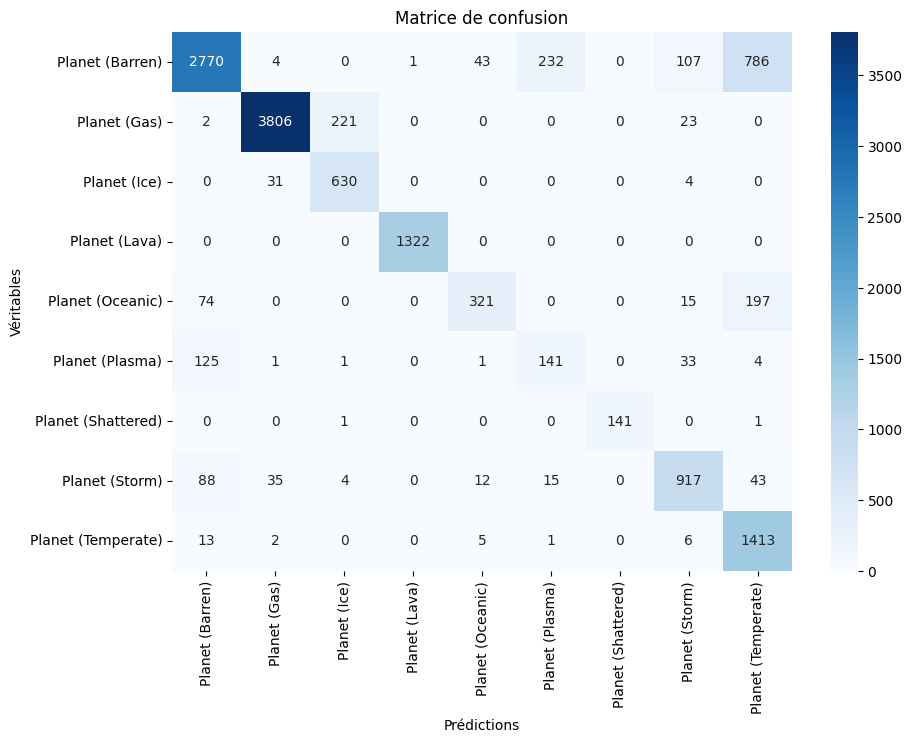

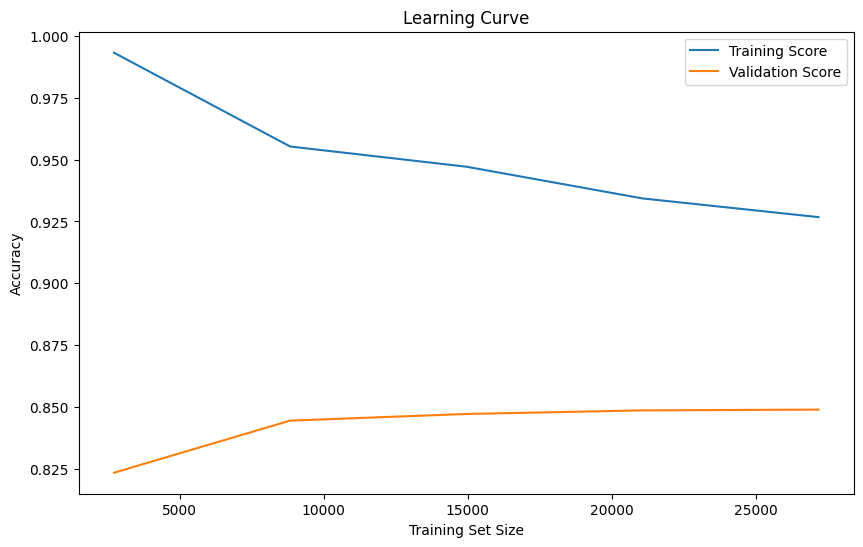

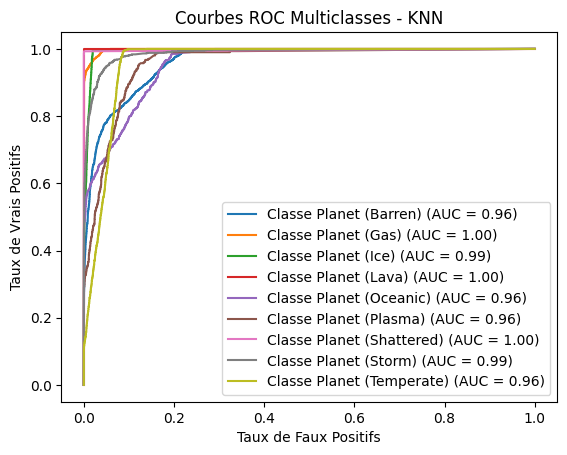

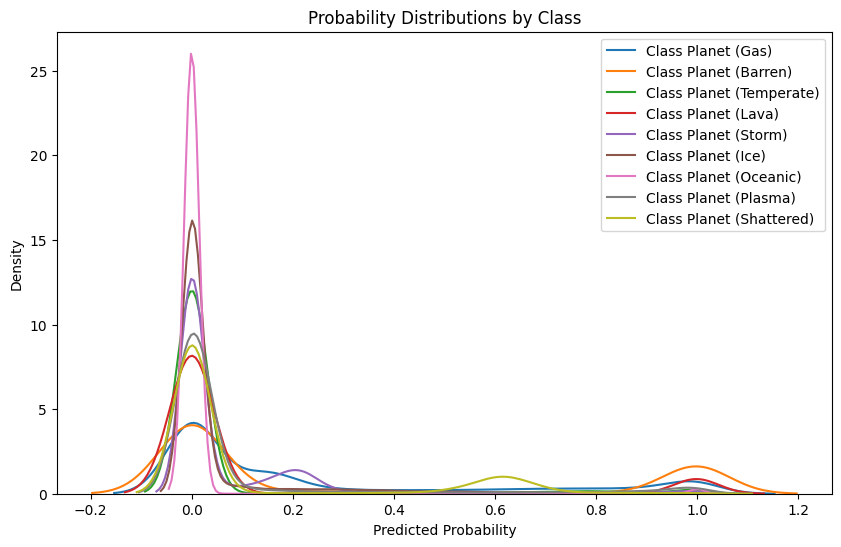

Fichiers sauvegardés dans RF\Without-Smote-CV=2-2025-01-09_20-08-57.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'RF_data' créée ou déjà existante.
Données insérées avec succès dans la table RF_data.


In [7]:
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity','surfaceGravity']
Echantillon_min = 100        # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
smote_status = False         # True pour utiliser SMOTE, False pour ne pas utiliser SMOTE
sampling_strategy = False     # Stratégie de la distribution des données pour le SMOTE
sampling_number = 7200       # Nombre d'échantillon pour le SMOTE
Save_Model = True            # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire RF 


"""
smote_status = False
sampling_strategy = False
sampling_number = 0 
CV_data = 3 
param_grid = {
'n_estimators': [100,125,150],
'max_depth': [5,10],
'min_samples_split': [1,5,10],
'min_samples_leaf': [1,2,5],
'max_features': ['sqrt', 'log2']
}
"""    

# Simulation avec les paramètres suivants pour la Random Forest 
"""
smote_status = False
sampling_strategy = False
sampling_number = 0
CV_data = 2                  
param_grid = {'n_estimators': [37],'max_depth': [20],'min_samples_split': [2],'min_samples_leaf': [1],'max_features': ['sqrt', 'log2']}
"""
# Fin paramètre des simulations


smote_status = False
sampling_strategy = False
sampling_number = 0
CV_data = 2                  
param_grid = {'n_estimators': [37],'max_depth': [20],'min_samples_split': [2],'min_samples_leaf': [1],'max_features': ['sqrt', 'log2']}


if smote_status== False:        # Si le SMOTE est désactivé
    sampling_strategy = False   # La stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0

if sampling_strategy == False:  # Si la stratégie de distribution est désactivée
    sampling_number = 0         # Le nombre d'échantillon est à 0
# On utilise le dataset des planètes voir si la RandomForest donne un résultat plus intéressant que la méthode K-NN
df_data = df_planet.copy()
    
# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)
print(f"\n\n")

RandomForest2(sampling_strategy,sampling_number,smote_status,df_data,param_grid,CV_data,X_Chara,Y_Target,Echantillon_min,Save_Model)

Performances globales

    Accuracy (Test) : 85 %
    Accuracy (Entraînement) : 90 %
    Écart biais-variance : -0.06 → Le modèle est équilibré avec un bon compromis entre biais et variance.

Analyse des classes

    Classes bien prédictes :
        Planet (Lava), Planet (Shattered) : Excellente précision et rappel (F1-scores proches de 1.00).
        Planet (Gas) : Très bonne performance (F1-score : 0.96).
        Planet (Storm) : Solide équilibre avec un F1-score de 0.83.

    Classes moyennement prédictes :
        Planet (Barren) : Bonne précision (90 %), mais un rappel faible (70 %), indiquant un taux non négligeable de faux négatifs.
        Planet (Ice) : Très bon rappel (95 %) mais précision modérée (74 %), ce qui pourrait indiquer quelques faux positifs.

    Classes mal prédictes :
        Planet (Oceanic) : Précision correcte (85 %), mais faible rappel (55 %), ce qui indique des confusions fréquentes.
        Planet (Plasma) : Faibles performances globales (F1-score de 0.42).
        Planet (Temperate) : Précision limitée (58 %), mais très bon rappel (98 %).
        
 Problèmes identifiés

    Classes mal prédictes :
        Planet (Plasma) et Planet (Oceanic) montrent des limites importantes dans leur classification.
        Confusions fréquentes dans la matrice de confusion pour ces classes.

    Données déséquilibrées :
        Les classes Plasma, Shattered, et Oceanic sont sous-représentées, ce qui peut expliquer des performances variables.       

Deep learning

Voici une description détaillée et structurée des étapes suivies dans votre réseau neuronal :
1. Chargement et Prétraitement des Données

    Chargement des Données :
        Les données sont copiées à partir de df_planet pour préserver l'original.
        Les classes ayant un nombre d'échantillons inférieur à un seuil (Echantillon_min) sont filtrées.

    Préparation des Données :
        Les caractéristiques (X) et les étiquettes (y) sont extraites avec la fonction Calcul_XX_YY_2.
        Les étiquettes sont encodées pour les rendre exploitables par le réseau neuronal.

    Équilibrage des Classes (Optionnel) :
        Si Smote_State est activé, le SMOTE est appliqué pour équilibrer les classes en générant des données synthétiques pour les classes minoritaires.

    Normalisation des Données :
        Les caractéristiques (X) sont normalisées à l'aide de StandardScaler pour réduire les écarts d'échelle entre les variables.

    Encodage des Étiquettes :
        Les étiquettes (y) sont converties en format one-hot encoding pour la classification multi-classes.

2. Division du Jeu de Données

    Division Train/Validation/Test :
        Les données sont divisées en trois ensembles :
            Entraînement (70%)
            Validation (15%)
            Test (15%)

    Reshape des Données :
        Les données sont reformattées pour être compatibles avec les couches convolutives : chaque échantillon devient une matrice 2D avec une seule dimension de canal.

3. Calcul et Ajustement des Poids de Classe

    Poids de Classe (Optionnel) :
        Si SMOTE n'est pas utilisé, des poids de classe sont calculés pour compenser les déséquilibres entre classes.
        Si Weight_Class est activé, ces poids sont ajustés en appliquant un facteur multiplicatif (Adjust_Factor) pour privilégier les classes ayant de faibles performances.

4. Conception du Modèle CNN

    Couches Convolutives :
        Deux couches convolutives avec des tailles de filtre de 3 et des activations ReLU.
        MaxPooling est appliqué pour réduire la taille des caractéristiques.
        Dropout est utilisé pour prévenir le surapprentissage.

    Couches Dense :
        Les caractéristiques sont aplaties et passées dans des couches entièrement connectées (Dense) avec :
            256, 128, puis 64 neurones respectivement.
            Regularisation L2 pour éviter le surapprentissage.
            BatchNormalization pour stabiliser et accélérer l'entraînement.
            Dropout est appliqué entre les couches.

    Sortie :
        Une couche de sortie avec une activation softmax pour produire des probabilités pour chaque classe.

5. Compilation et Configuration

    Compilation du Modèle :
        Fonction de perte : categorical_crossentropy, adaptée à la classification multi-classes.
        Optimiseur : Adam avec un taux d'apprentissage (Learning_Rate) défini par l'utilisateur.
        Métriques : accuracy.

    Configuration GPU :
        Si un GPU est disponible, il est configuré pour une allocation dynamique de mémoire.

6. Entraînement du Modèle

    Callbacks :
        EarlyStopping : Arrête l'entraînement si la perte de validation ne s'améliore pas pendant 5 époques.
        ReduceLROnPlateau : Réduit dynamiquement le taux d'apprentissage si la perte stagne.

    Entraînement :
        Le modèle est entraîné sur l'ensemble d'entraînement avec validation sur l'ensemble de validation.
        Les poids des classes (si calculés) sont utilisés pour pondérer la fonction de perte.

7. Évaluation et Sauvegarde

    Évaluation :
        Les performances sont évaluées sur l'ensemble de test.
        La fonction Affichage2 génère un rapport détaillé, des graphiques, et affiche les résultats.

    Sauvegarde des Résultats :
        Si Save_Model est activé, le modèle, le scaler, et les métriques sont sauvegardés pour une utilisation future.

TypeCoreName  Planet (Gas)  Planet (Barren)  Planet (Temperate)  Planet (Lava)  Planet (Storm)  Planet (Ice)  Planet (Oceanic)  Planet (Plasma)  Planet (Shattered)  Planet (Scorched Barren)
count         20262         19714            7200                6611           5569            3324          3036              1531             713                 1                       
Classes encodées : ['Planet (Barren)', 'Planet (Gas)', 'Planet (Ice)', 'Planet (Lava)', 'Planet (Oceanic)', 'Planet (Plasma)', 'Planet (Shattered)', 'Planet (Storm)', 'Planet (Temperate)']
GPU disponible : []
Epoch 1/200
850/850 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3277 - loss: 7.8480 - val_accuracy: 0.5489 - val_loss: 3.5128 - learning_rate: 5.0000e-04
Epoch 2/200
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5303 - loss: 2.9867 - val_accuracy: 0.6583 - val_loss: 1.6236 - learning_rate: 5.0000e-04
Epoch 3/200
850/850 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5705 - loss: 1.5435 - val_accu

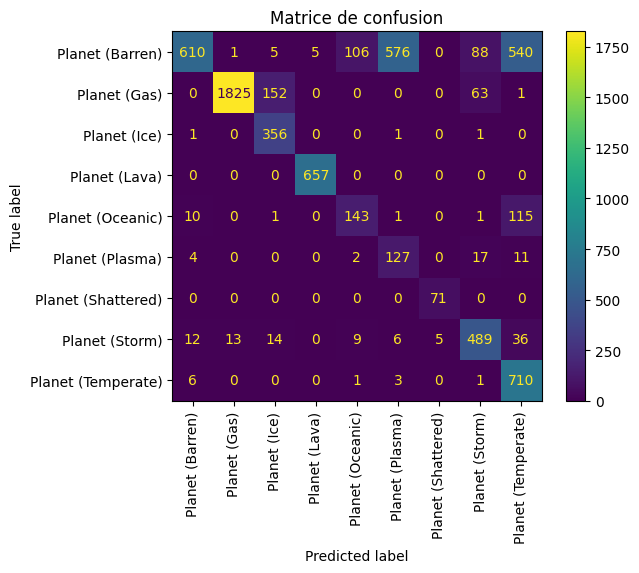

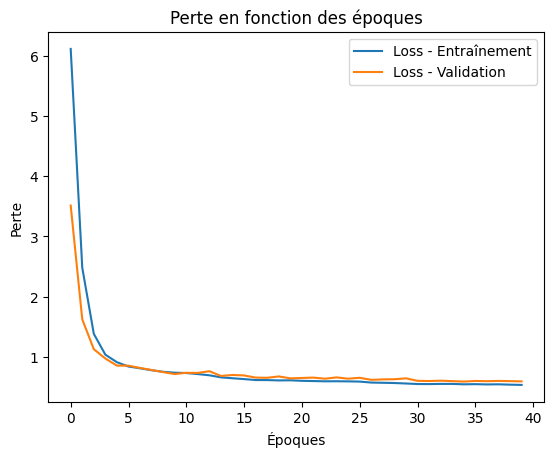

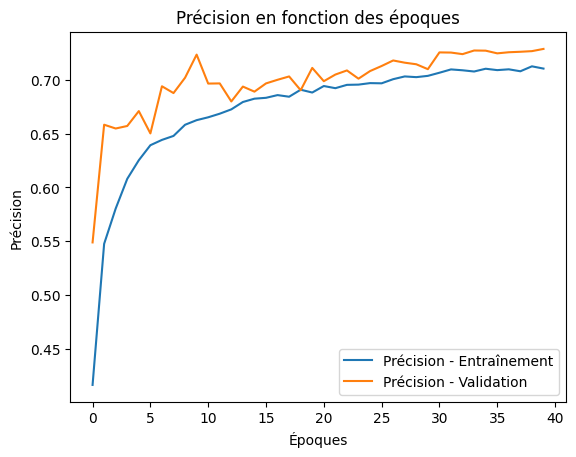

213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step


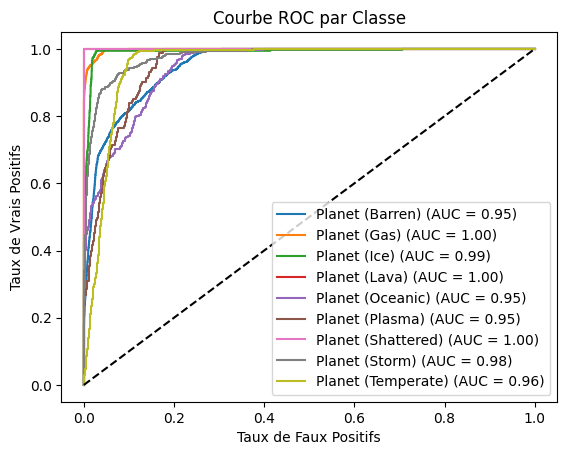

Fichiers sauvegardés dans DP\DP-Epoch=200,Batch_size=64-2025-01-09_20-05-28.zip
Base de données 'data.db' ouverte avec succès dans 'g:\python\Eve projet\Certification XXV\data.db'.
Table 'DP_data' créée ou déjà existante.
Données insérées avec succès dans la table DP_data.


In [5]:
"""
# Data de simulation
Echantillon_min=100     # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity','surfaceGravity']
Smote_State = True     # Activation de la fonction Smote, Rééquilibrage des classes
Weight_Class = False    # Activation du poids des classes
Adjust_Factor = 1.5     # Facteur d'ajustement pour le poids des classes (Seul deux classes sont impactées) Barren et Oceanic
Epoque = 200            # Nombre d'époques    
batch_size_nbr = 64     # Taille du batch 64
Learning_Rate = 0.0005  # Taux d'apprentissage
Save_Model = True       # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire DP
"""
Echantillon_min=100     # Nbr d'échantillon minimal pour l'analyse, si il y a moins de 100 planètes d'un type nous ne la prenons pas en compte
Y_Target = 'TypeCoreName'
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity','surfaceGravity']
Smote_State = True     # Activation de la fonction Smote, Rééquilibrage des classes
Weight_Class = False    # Activation du poids des classes sans smote
Adjust_Factor = 1.5     # Facteur d'ajustement pour le poids des classes (Seul deux classes sont impactées) Barren et Oceanic
Epoque = 200            # Nombre d'époques    
batch_size_nbr = 64     # Taille du batch 64
Learning_Rate = 0.0005  # Taux d'apprentissage
Save_Model = True       # Sauvegarde les paramètres et le modèle dans fichier Zip dans le Répertoire DP

if Smote_State== True:        # Si le SMOTE est activé
    Weight_Class = False       # Le poids des classes est désactivé
    Adjust_Factor = 0          # Le facteur d'ajustement est à 0

# Grouper par 'TypeCoreName' et compter les occurrences de chaque type
typecore_count = df_planet['TypeCoreName'].value_counts()
typecore_table = typecore_count.to_frame().T  # Vision Horizontal
print(typecore_table)


Deep2(Smote_State,df_planet,Echantillon_min,Y_Target,X_Chara,Weight_Class,Adjust_Factor,Epoque,batch_size_nbr,Learning_Rate,Save_Model)

1. Précision Globale

    Précision sur les données de test : 84%.
    Précision sur les données d'entraînement : 84%.

Analyse

    La précision globale est satisfaisante, avec une bonne généralisation du modèle, car les performances sur l'entraînement et le test sont similaires.
    Cela indique que le modèle ne souffre pas de surapprentissage (overfitting) ni de sous-apprentissage (underfitting).

2. Matrice de Confusion

    Les classes comme Planet (Gas), Planet (Lava), et Planet (Shattered) sont très bien classifiées (faible confusion avec d'autres classes).
    Les classes problématiques :
        Planet (Plasma) : Rappel faible (22%) malgré une précision élevée (97%). Cette classe est sous-représentée ou ambiguë.
        Planet (Oceanic) et Planet (Temperate) montrent des confusions fréquentes avec d'autres classes.

Suggestions :

    Les classes minoritaires comme Planet (Plasma) pourraient bénéficier d'une augmentation de données ou d'un ajustement des poids pour améliorer leur rappel.
    Une meilleure séparation entre Planet (Oceanic) et les autres classes pourrait nécessiter une exploration des caractéristiques.

3. Courbe ROC et AUC

    AUC globale élevée : Les valeurs AUC sont comprises entre 0.95 et 1.00 pour la plupart des classes.
    Les classes Planet (Plasma) et Planet (Oceanic) ont une AUC légèrement inférieure (environ 0.95), ce qui reflète leur difficulté de classification.

Analyse

    Le modèle a une très bonne capacité de différenciation des classes.
    Les classes ayant une AUC inférieure méritent une attention particulière pour des améliorations ciblées.

4. Évolution de la Perte et de la Précision

    Perte :
        La perte diminue de manière régulière pour l'entraînement et la validation, et converge vers des valeurs faibles.
    Précision :
        La précision s'améliore de manière cohérente au fil des époques et atteint une valeur stable autour de 84%.

Analyse

    L'entraînement est stable, et les callbacks (réduction du learning rate et arrêt précoce) ont permis d'éviter des oscillations ou une divergence.

5. Rapport de Classification
Sur les Données de Test

    Classes bien classifiées :
        Planet (Gas), Planet (Lava), et Planet (Shattered) ont un F1-score supérieur à 0.95.
    Classes problématiques :
        Planet (Plasma) : Faible rappel (22%) malgré une précision élevée.
        Planet (Oceanic) : F1-score de 0.59, principalement à cause d'un faible rappel (49%).

Sur les Données d'Entraînement

    Les résultats reflètent ceux des données de test, avec une bonne cohérence dans les performances globales.

Affichage des paramètres des planètes Barren et Plasma

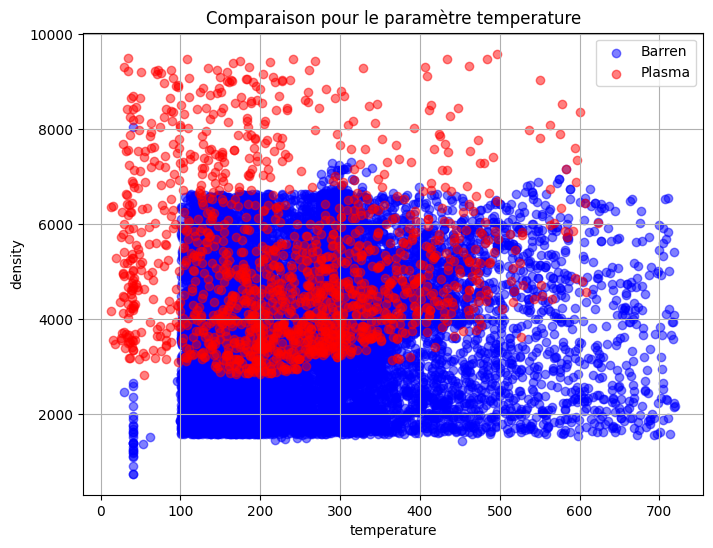

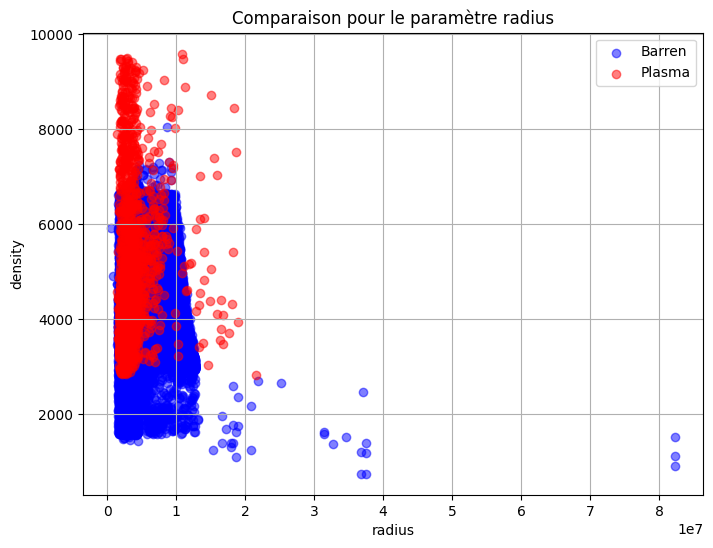

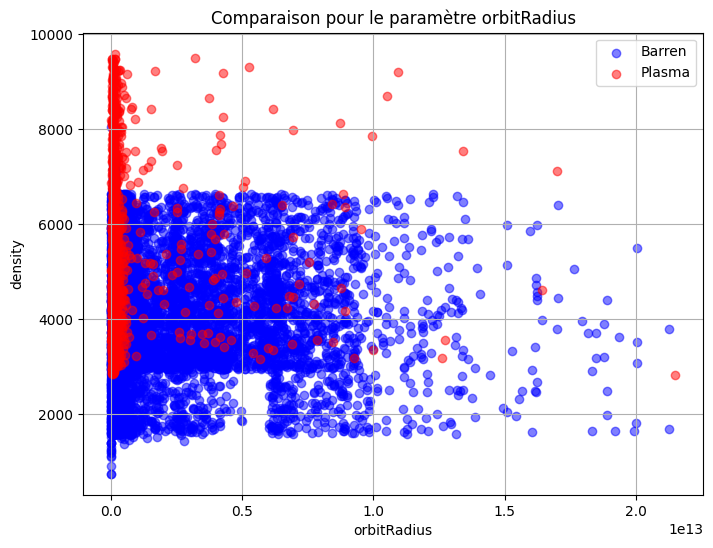

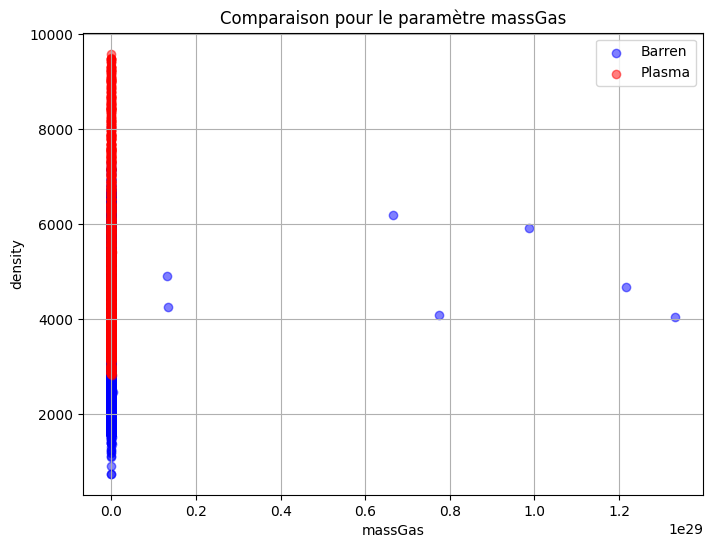

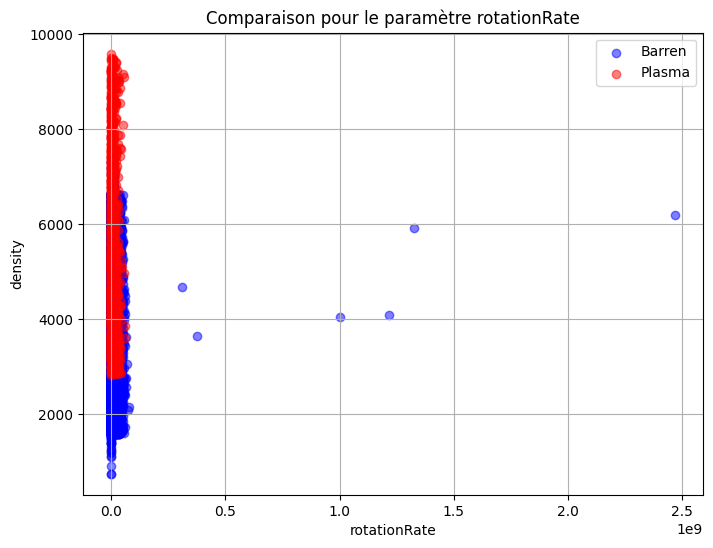

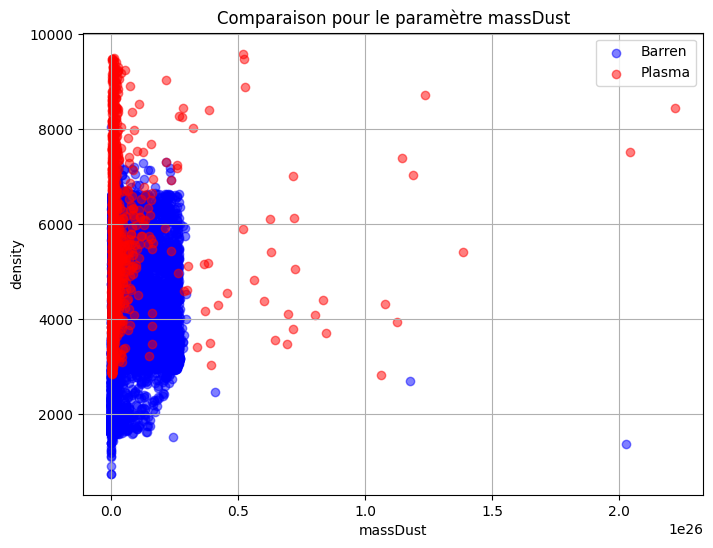

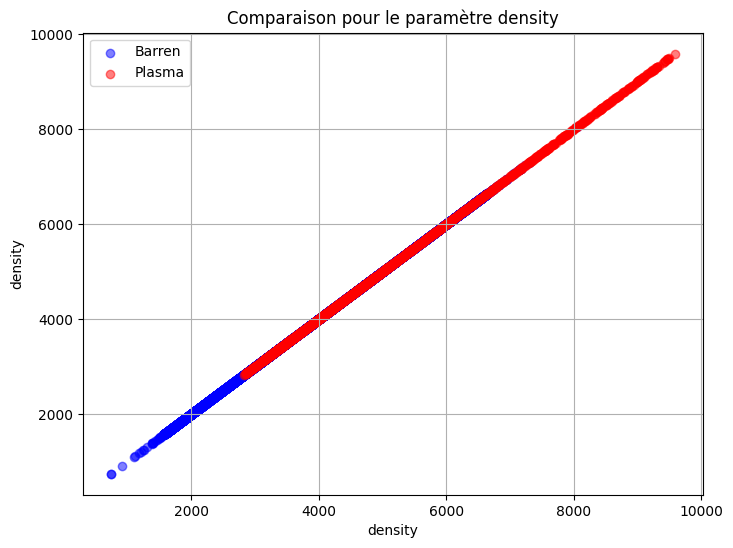

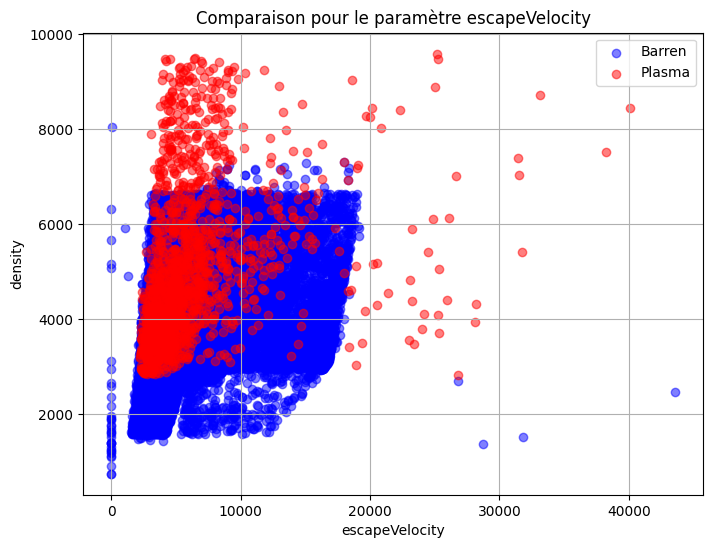

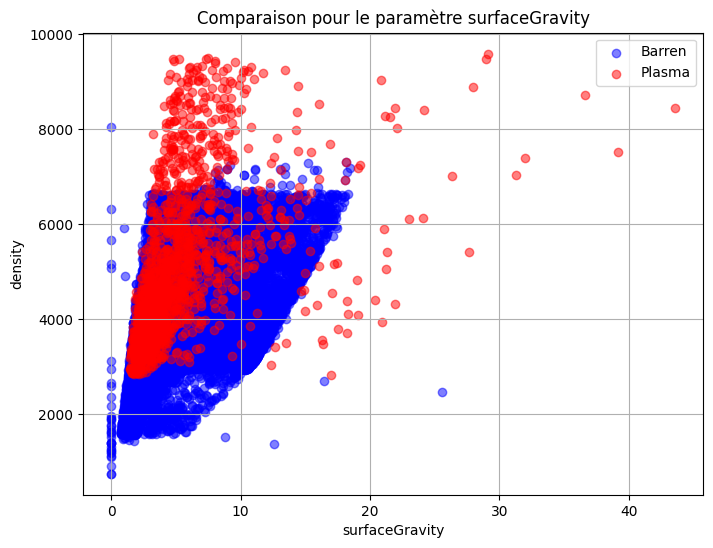

In [3]:
df = df_planet.copy()
X_Chara = ['temperature','radius','orbitRadius','massGas','rotationRate','massDust','density','escapeVelocity','surfaceGravity']
df_barren = df[df["TypeCoreName"]=="Planet (Barren)"]
df_plasma = df[df["TypeCoreName"]=="Planet (Plasma)"]
import matplotlib.pyplot as plt
for param in X_Chara:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_barren[param], df_barren["density"], color="blue", alpha=0.5, label="Barren")
    plt.scatter(df_plasma[param], df_plasma["density"], color="red", alpha=0.5, label="Plasma")
    plt.title(f"Comparaison pour le paramètre {param}")
    plt.xlabel(param)
    plt.ylabel("density")
    plt.legend()
    plt.grid(True)
    plt.show()

Conclusion :

On constate que de nombreux paramètres sont communs entre certaines classes, ce qui explique en partie la confusion observée entre elles. Malgré cela, le modèle se révèle globalement performant, que ce soit en Random Forest ou en Deep Learning, démontrant la robustesse des approches utilisées.

Il pourrait être intéressant d'explorer de nouvelles pistes pour améliorer encore les performances du modèle. Par exemple :

    Identifier ou créer de nouvelles variables discriminantes pour mieux séparer les classes présentant des similarités, ce qui pourrait réduire les confusions.
    Optimiser le prétraitement des données, notamment en affinant les étapes de normalisation ou en utilisant des techniques avancées comme des transformations numériques plus adaptées.
    Construire des sous-modèles dédiés aux classes proches, qui permettraient de rajouter un paramètre discriminant avant l'intégration dans le modèle principal.

Ce projet a été une expérience particulièrement enrichissante et stimulante. J’ai pris beaucoup de plaisir à l’explorer et à le développer, et je suis motivé à poursuivre mes efforts pour continuer à améliorer les performances du modèle et relever de nouveaux défis dans ce domaine.


